In [65]:
%load_ext pycodestyle_magic

### Section 1: Business Understanding
we have stackoverflow suvey data 2017 and we will be analysing the data to start the career as a developer or non developer. so, there are 3 following questions which can help to undeerstand the career to choose.

#### Question 1: Which Developer type has the highest salary?
#### Question 2: Which developer type has the highest career satisfaction?
#### Question 3: Which non developer type has the highest career satisfaction?

In [66]:
# Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# setting option to view all columns of the dataset
pd.set_option('display.max_columns', None)

### Section 2: Data Understanding
Gather Data and normalize it for data preparation.


In [67]:
# read csv file
df = pd.read_csv('./Data/survey_results_public.csv')
# df['DeveloperType'].head()

In [68]:
df.YearsCodedJob.unique()

array([nan, '20 or more years', '9 to 10 years', '10 to 11 years',
       '8 to 9 years', '7 to 8 years', '11 to 12 years', '15 to 16 years',
       '1 to 2 years', '3 to 4 years', '12 to 13 years',
       'Less than a year', '5 to 6 years', '16 to 17 years',
       '13 to 14 years', '6 to 7 years', '2 to 3 years', '17 to 18 years',
       '4 to 5 years', '14 to 15 years', '18 to 19 years',
       '19 to 20 years'], dtype=object)

Fetch unique developer types and categorize them

In [69]:
%%pycodestyle
# drop rows with null values
df_developer = df[['DeveloperType']].dropna()

# split developer categories if a professional has multiple categories
# and prepare a list of categories with unique value
df_developer['Developer_Type'] = df_developer['DeveloperType'].str.split(';')
df_developer['Developer_Type'] = (df_developer['Developer_Type']
                                  .apply(lambda x: [i.strip() for i in x]
                                         if isinstance(x, pd.Series) else x))
df_list = df_developer['Developer_Type'].explode().dropna()
df_list = df_list[df_list != '']

unique_values = df_list.unique()
# unique_values
Developer = ['Mobile developer', 'Graphics programming', 'Web developer',
             'Embedded applications/devices developer', 'Graphic designer',
             'Desktop applications developer']
Admin = ['Database administrator', 'Systems administrator']
Data_Scientist = ['Data scientist', 'Machine learning specialist',
                  'Developer with a statistics or mathematics background']
Tester = ['Quality assurance engineer']
other = ['Other', 'DevOps specialist']

24:1: W391 blank line at end of file


Fetch unique non developer types and categorize them

In [70]:
%%pycodestyle
# drop null rows
df_nondeveloper = df[['NonDeveloperType']].dropna()

# split developer categories if a professional has multiple categories
# and prepare a list of categories with unique value
df_nondeveloper['NonDeveloper_Type'] = (
       df_nondeveloper['NonDeveloperType']
       .str.split(';'))
df_nondeveloper['NonDeveloper_Type'] = (
       df_nondeveloper['NonDeveloper_Type']
       .apply(lambda x: [i.strip() for i in x]
              if isinstance(x, pd.Series) else x))
df_list_nd = (df_nondeveloper['NonDeveloper_Type']
              .explode().dropna())
df_list_nd = df_list_nd[df_list_nd != '']

unique_values = df_list_nd.unique()
unique_values

Analyst = ['Data scientist', 'Analyst or consultant',
           'Designer or illustrator']
Manager = ['C-suite executive', 'Product manager',
           'Marketing or sales manager']
Educator = ['Educator or academic']
other = ['Other', 'Elected official']

27:1: W391 blank line at end of file


Function definition to generate a column with categorized developer and non developer

In [71]:
%%pycodestyle
# function definition for developer and their categories
def check_skill_developer(item_str):
    '''
        returns normalised category for developers as a
        profession when a common categroy string will be
        provided and it look up into the pre defined list
        of categories.

        input:
            item_str: string value
        output:
            name of the list of the categories
    '''

    if item_str is None:
        return 'No Data'
    elif any(val in item_str for val in Developer):
        return 'Developer'
    elif any(val in item_str for val in Admin):
        return 'Admin'
    elif any(val in item_str for val in Data_Scientist):
        return 'Data_Scientist'
    elif any(val in item_str for val in Tester):
        return 'Developer'
    elif any(val in item_str for val in other):
        return 'other'


# function definition for non-developer and their categories
def check_skill_nondeveloper(item_str):
    '''
        returns normalised category for developers as a
        profession when a common categroy string will be
        provided and it look up into the pre defined list
        of categories.

        input:
            item_str: string value
        output:
            name of the list of the categories
    '''

    if item_str is None:
        return 'No Data'
    elif any(val in item_str for val in Analyst):
        return 'Analyst'
    elif any(val in item_str for val in Manager):
        return 'Manager'
    elif any(val in item_str for val in Educator):
        return 'Educator'
    elif any(val in item_str for val in other):
        return 'other'

54:1: W391 blank line at end of file


In [72]:
df['Professional'].unique()

array(['Student', 'Professional developer',
       'Professional non-developer who sometimes writes code',
       'Used to be a professional developer', 'None of these'],
      dtype=object)

### Section 3: Data Preparation
Generated more common data for usage, remove null/nan and filter for full time employee and professionals

In [75]:
df_employee = df[df['EmploymentStatus'] == 'Employed full-time']

years = {'Less than a year' : 0,
        '1 to 2 years' : 1, 
        '2 to 3 years' : 2,
        '3 to 4 years' : 3, 
        '4 to 5 years' : 4, 
        '5 to 6 years' : 5, 
        '6 to 7 years' : 6, 
        '7 to 8 years' : 7, 
        '8 to 9 years' : 8, 
        '9 to 10 years' : 9, 
        '10 to 11 years' : 10, 
        '11 to 12 years' : 11, 
        '12 to 13 years' : 12,
        '13 to 14 years' : 13, 
        '14 to 15 years' : 14, 
        '15 to 16 years' : 15, 
        '16 to 17 years' : 16,
        '17 to 18 years' : 17, 
        '18 to 19 years' : 18, 
        '19 to 20 years' : 19, 
        '20 or more years' : 20,
        np.nan : -1}

data_employee = df_employee.reset_index()
data_employee['YearsCodedJob'] = (data_employee['YearsCodedJob']
                                  .apply(lambda x: years[x]))
data_employee['YearsCodedJob'] = pd.to_numeric(data_employee['YearsCodedJob'])

# We erase the points with -1 since they were the placeholders for -1
data_employee = data_employee[data_employee['YearsCodedJob'] != -1]

data_employee.YearsCodedJob.unique()
data_employee['YearsCodedJob'].head(2)

0    20
1     9
Name: YearsCodedJob, dtype: int64

developer dataframe preparation

In [77]:
%%pycodestyle
df_developer = (data_employee[data_employee['Professional'] ==
                'Professional developer'])

df_developer = df_developer.dropna(subset=['DeveloperType'])
df_developer['Developer_Type'] = (df_developer['DeveloperType']
                                  .apply(check_skill_developer))

df_developer.head(2)

10:1: W391 blank line at end of file


non developer dataframe preparation

In [82]:
%%pycodestyle
df_nondeveloper = (
    data_employee[data_employee['Professional'] ==
                  'Professional non-developer who sometimes writes code'])
df_nondeveloper = df_nondeveloper.dropna(subset=['NonDeveloperType'])

df_nondeveloper['NonDeveloper_Type'] = (df_nondeveloper['NonDeveloperType']
                                        .apply(check_skill_nondeveloper))
df_nondeveloper.head(2)


10:1: W391 blank line at end of file


select columns of interest and final dataframe for analysis

In [100]:
# select fields for purpose
cols_developer = ['Respondent', 'Developer_Type', 'YearsCodedJob',
                  'CareerSatisfaction', 'Salary']
cols_nondeveloper = ['Respondent', 'NonDeveloper_Type',
                     'YearsCodedJob', 'CareerSatisfaction',
                     'Salary']

# developer dataframes
data_developer = df_developer[cols_developer]
df_salary_developer = data_developer[~data_developer['Salary'].isna()]
df_CareerSatisfaction_developer = (
    data_developer[~data_developer['CareerSatisfaction'].isna()])

# non developer dataframes
data_nondeveloper = df_nondeveloper[cols_nondeveloper]
df_salary_nondeveloper = data_nondeveloper[~data_nondeveloper['Salary'].isna()]
df_CareerSatisfaction_nondeveloper = (
    data_nondeveloper[~data_nondeveloper['CareerSatisfaction'].isna()])

df_CareerSatisfaction_nondeveloper.head()

,Respondent,NonDeveloper_Type,YearsCodedJob,CareerSatisfaction,Salary
1,4,Analyst,9,6.0,NaN
3,7,Analyst,8,7.0,NaN
6,11,other,11,8.0,NaN
20,29,Manager,13,8.0,NaN
21,30,other,3,6.0,NaN


### Section 4: Analyze and Visualize the data
#### Question 1: Which Developer type has the highest salary?

Consider the median as our value of comparison for developer type salaries and plot a bar graph on it. this will help to see the difference of salaries of each categoreies


Text(0.5, 1.0, 'Median of Salaries by Developer type')

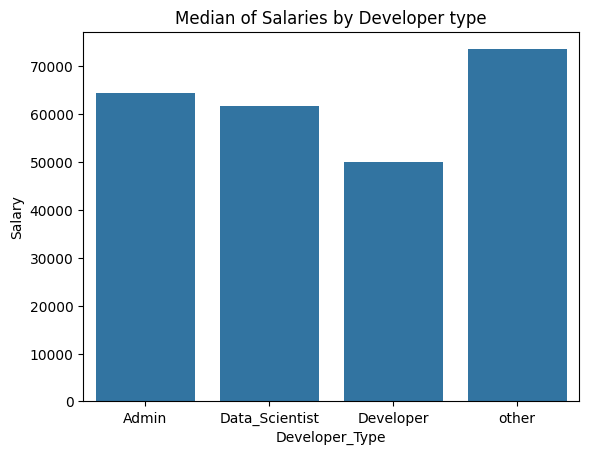

In [101]:
# get median of each categories of developers
salary_plot = (df_salary_developer
               .groupby(['Developer_Type'])['Salary']
               .median().reset_index())

sns.barplot(x='Developer_Type', y='Salary', data=salary_plot)
plt.title('Median of Salaries by Developer type')

> We can easily see that the professional who are not either Admin, data scientist or developer has highest salary. But this other categories is still not clear to choose the profession. Also, on the other hand if we will consider the known categories from the survey then Admins have higher salary than Data scientist and developers.

#### Question 2: Which developer type has the highest career satisfaction?


we will see the trend of professionals input for their satisfaction over the period of their experience. Considering a professionals sastifaction varies during it work tenure, we willplot a graph from the mean of their ratings for career satisfaction


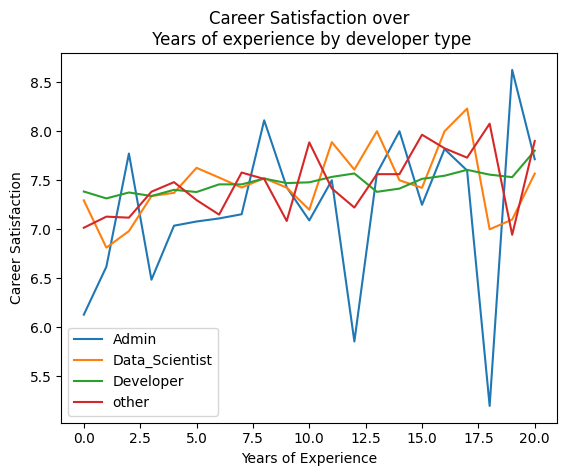

In [103]:
developer_careerSatisfcation_plot = (df_CareerSatisfaction_developer
                                     .groupby(['YearsCodedJob',
                                               'Developer_Type'])
                                     ['CareerSatisfaction']
                                     .mean().reset_index())

sns.lineplot(x="YearsCodedJob",
             y="CareerSatisfaction",
             hue="Developer_Type",
             data=developer_careerSatisfcation_plot)
plt.ylabel('Career Satisfaction')
plt.xlabel('Years of Experience')
plt.title('Career Satisfaction over\n Years of experience by developer type')
plt.legend(loc=3)

>Except admins, all other categories developers have their satisfaction lvel between 6.5 and 8. we can assume that they are satisefied from their jobs irrespective of their work experience.

#### Question 3: Which non developer type has the highest career satisfaction?

we are doing the similar analysis for no developers now. we will see the trend of professionals input for their satisfaction over the period of their experience. Considering a professionals sastifaction varies during it work tenure, we willplot a graph from the mean of their ratings for career satisfaction


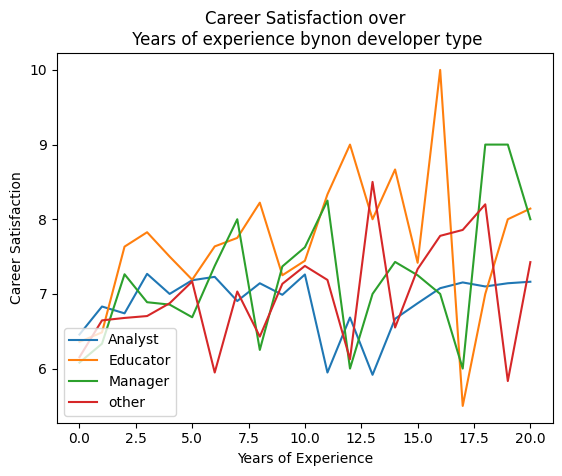

In [104]:
nondeveloper_careerSatisfcation_plot = (
    df_CareerSatisfaction_nondeveloper
    .groupby(['YearsCodedJob', 'NonDeveloper_Type'])
    ['CareerSatisfaction'].mean().reset_index())

sns.lineplot(x="YearsCodedJob",
             y="CareerSatisfaction",
             hue="NonDeveloper_Type",
             data=nondeveloper_careerSatisfcation_plot)
plt.ylabel('Career Satisfaction')
plt.xlabel('Years of Experience')
plt.title('Career Satisfaction over\n Years of experience by'
          'non developer type')
plt.legend(loc=3)

>looking into the data above, it is hard to tell who is more satisfied from their job. Educators interest increases till the they work for arounf 16 years but their is suidden drop of their interest in next 1 year but it is also interesting that their work culture become more satisfactory.

Conclusion: there is lots of up and down in the professionals interest during their work experience. It seems that the work environment and pressure can be the parameter for their job satisfaction ratings.